# Technological surveillance

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [41]:
def substringSieve(string_list):
    '''
        Function to clean same authors with different substring
    '''
    string_list.sort(key=lambda s: len(s), reverse=True)
    out = []
    for s in string_list:
        if not any([s in o for o in out]):
            out.append(s)
    deleted_items = list(set(string_list) - set(out))
    for d in deleted_items:
        for ii, el in enumerate(out):
            if d in el:
                out.pop(ii)
                out.append(d)
                break
    return out

In [42]:
df = pd.read_csv('EQ2.csv').fillna(0)
authors = substringSieve(list(set([ii.lstrip() for auth_block in df['Authors'] for ii in auth_block.split(',') if 'No author name' not in ii])))
sources = set(df['Source title'])
affiliations = set(df['Affiliations'])
papers = set(df['Title'])

## 1st grade analysis

In [43]:
'''
    Processing data
'''
years = set(df['Year'])
publications_per_year = pd.DataFrame({year: [len(df.query(f'Year == {year}'))] for year in years}).T.sort_index()
publications_per_year.columns = ['Publications']

publications_per_author = pd.DataFrame(data={author: [len(list(filter(lambda x: author in x, df['Authors'])))] for author in authors}).T
publications_per_author.columns = ['Publications']

publications_per_affiliations =  pd.DataFrame(data={affiliation: [len(list(filter(lambda x: affiliation == x, df['Affiliations'])))] for affiliation in affiliations if type(affiliation) == str}).T
publications_per_affiliations.columns = ['Publications']

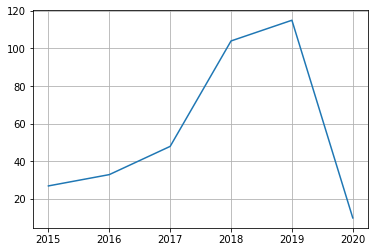

In [44]:
'''
    Number of publications per year
'''
plt.plot(publications_per_year.index, publications_per_year['Publications'])
plt.xlabel = 'Year'
plt.ylabel = 'Publications'
plt.grid()
plt.show()

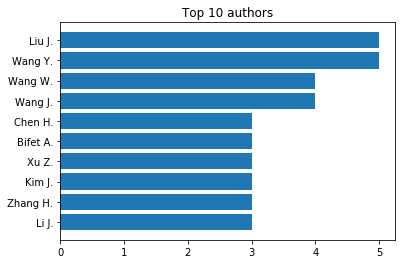

In [45]:
'''
    Publications by author
'''
top_authors = publications_per_author.sort_values(by=['Publications'], ascending=False).head(10)
plt.barh(np.arange(len(top_authors)), top_authors['Publications'])
plt.yticks(np.arange(len(top_authors)), top_authors.index)
plt.gca().invert_yaxis()
plt.title('Top 10 authors')
plt.xlabel = 'Publications'
plt.show()

In [46]:
# '''
#     Publications by affiliations #TODO: buggy. No usan mismos nombres las affiliations. Habría que procesar el texto para coger sólo la affiliaton
# '''
# top_affiliations = publications_per_affiliations.sort_values(by=['Publications'], ascending=False).head(10)
# plt.barh(np.arange(len(top_affiliations)), top_affiliations['Publications'])
# plt.yticks(np.arange(len(top_affiliations)), top_affiliations.index)
# plt.gca().invert_yaxis()
# plt.title('Top 10 affiliations')
# plt.xlabel = 'Publications'
# plt.show()

## 2nd grade analysis

In [67]:
'''
    Processing data
'''
cites_per_author = pd.DataFrame(data={author: [df[df['Authors'].str.contains(author)]['Cited by'].sum()] for author in authors}).T
cites_per_author.columns = ['Cites']
cites_per_source = pd.DataFrame(data={source: [df[df['Source title'].str.contains(source)]['Cited by'].sum()] for source in sources}).T
cites_per_source.columns = ['Cites']
cites_per_paper = pd.DataFrame(data={paper: [df[df['Title'] == paper]['Cited by'].sum()] for paper in papers}).T
cites_per_paper.columns = ['Cites']

In [0]:
'''
    Top 10 Authors by cites
'''
top_authors = cites_per_author.sort_values(by=['Cites'], ascending=False).head(10)
plt.barh(np.arange(len(top_authors)), top_authors['Cites'])
plt.yticks(np.arange(len(top_authors)), top_authors.index)
plt.gca().invert_yaxis()
plt.title('Top 10 authors')
plt.xlabel = 'Prueba'
plt.show()

In [0]:
'''
    Top 10 Sources by cites
'''
top_sources = cites_per_source.sort_values(by=['Cites'], ascending=False).head(10)
plt.barh(np.arange(len(top_sources)), top_sources['Cites'])
plt.yticks(np.arange(len(top_sources)), top_sources.index)
plt.gca().invert_yaxis()
plt.title('Top 10 sources')
# plt.xlabel('Cited times')
plt.show()

In [0]:
'''
    Top 10 Papers by cites
'''
top_papers = cites_per_paper.sort_values(by=['Cites'], ascending=False).head(10)
plt.barh(np.arange(len(top_papers)), top_papers['Cites'])
plt.yticks(np.arange(len(top_papers)), top_papers.index)
plt.gca().invert_yaxis()
plt.title('Top 10 papers')
# plt.xlabel('Cited times')
plt.show()

## 3rd grade analysis

In [0]:
'''
    Authors per source per cites
'''
sources_per_author = pd.DataFrame(data={author: [df[df['Authors'].str.contains(author)]['Source title']] for author in authors})
num_sources_per_author = pd.DataFrame(data={author: [len(sources_per_author[author][0])] for author in authors}).T
num_sources_per_author.columns = ['Sources']


In [0]:
'''
    Top 10 Authors by number of Sources which cited them
'''
top_authors = num_sources_per_author.sort_values(by=['Sources'], ascending=False).head(10)
plt.barh(np.arange(len(top_authors)), top_authors['Sources'])
plt.yticks(np.arange(len(top_authors)), top_authors.index)
plt.gca().invert_yaxis()
plt.title('Top 10 authors')
# plt.xlabel('Cited times')
plt.show()